In [1]:
################################################################################
# Copyright 2022 E. Kooistra
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
################################################################################
#
# Author: E. Kooistra, March 2022 creation
#                      July 2024 updated
# Purpose:
#   Calculate swivel OutputTube position and thrust pointing as function of
#   MidTube rotation.
# Description:
# * The swivel consist of InputTube, MidTube and OutputTube. The tubes connect
#   at an angle of alpha_tilt degrees.
#   . alpha_tilt is the tilt angle at which the tubes connect to eachother.
#   . theta_mid is the MidTube rotation in the alpha_tilt plane.
#   . theta_output_zx is the OutputTube thrust vector angle in the ZX plane.
#   . phi_input_yz is the angle in the YZ plane of the long side marker of the
#     InputTube.
#   . phi_output_yz is the angle in the YZ plane of the OutputTube.
# * Swivel control
#   . output_tube_pointing: for 'down' or 'up' control of the OutputTube.
#     This is 'down' for hovering an airplane.
#   . mid_tube_rotation: for 'positive' or 'negative' rotation angles of
#     theta_mid of the MidTube. This defines the swivel mounting, regarding YZ
#     orientation, in an airplane.

In [2]:
import importlib  # to reload a library when modified
import os.path
import numpy as np
import matplotlib.pyplot as plt

print(np.__version__)

1.19.2


In [3]:
import linear_algebra as la
importlib.reload(la)

<module 'linear_algebra' from 'D:\\git\\openscad\\math\\python\\linear_algebra.py'>

In [4]:
import swivel_functions as sw
importlib.reload(sw)

<module 'swivel_functions' from 'D:\\git\\Swivel\\python\\swivel_functions.py'>

# 1. Swivel parameters

In [5]:
# Swivel tube segment
alpha_tilt = 25  # Segment tilt angle [degrees]
x_input = 50     # Length of InputTube segment
x_mid = 80       # Length of MidTube segment
x_output = 40    # Length of OutputTube segment

# Swivel control
N_points = 1024  # over 360 degrees of theta_mid
N_degrees = 360

# Uncomment to select control option
output_tube_pointing = 'down'; mid_tube_rotation = 'positive'
#output_tube_pointing = 'down'; mid_tube_rotation = 'negative'
#output_tube_pointing = 'up'; mid_tube_rotation = 'positive'
#output_tube_pointing = 'up'; mid_tube_rotation = 'negative'

theta_mid_resolution = N_degrees / N_points

phi_output_yz_vertical = sw.PhiOutputYzVertical(output_tube_pointing)
phi_input_yz_vertical = sw.PhiInputYzVertical(output_tube_pointing)
phi_input_yz_horizontal = sw.InitPhiInputYzHorizontal(mid_tube_rotation)
phi_output_yz_horizontal = sw.InitPhiOutputYzHorizontal(mid_tube_rotation)
phi_input_yz_crosstalk_offset = sw.PhiInputYzCrosstalkOffset(output_tube_pointing, mid_tube_rotation)

swivel_tilt_max = sw.SwivelTiltMax(alpha_tilt)

theta_output_zx_horizontal = sw.ThetaOutputZxHorizontal()
theta_output_zx_vertical = sw.ThetaOutputZxVertical(output_tube_pointing)
theta_output_zx_max = sw.ThetaOutputZxMax(alpha_tilt)
theta_output_zx_min = sw.ThetaOutputZxMin(alpha_tilt)

angle_resolution = 0.2

print('output_tube_pointing       = %s' % output_tube_pointing)
print('mid_tube_rotation          = %s' % mid_tube_rotation)
print('')
print('N_points                   = %d' % N_points)
print('N_degrees                  = %d' % N_degrees)
print('theta_mid_resolution       = %.3f' % theta_mid_resolution)
print('')
print('phi_output_yz_vertical        = %.0f' % phi_output_yz_vertical)
print('phi_input_yz_vertical         = %.0f' % phi_input_yz_vertical)
print('phi_input_yz_horizontal       = %.0f' % phi_input_yz_horizontal)
print('phi_output_yz_horizontal      = %.0f' % phi_output_yz_horizontal)
print('phi_input_yz_crosstalk_offset = %.0f' % phi_input_yz_crosstalk_offset)
print('')
print('swivel_tilt_max            = %.0f' % swivel_tilt_max)
print('')
print('theta_output_zx_horizontal = %.0f' % theta_output_zx_horizontal)
print('theta_output_zx_vertical   = %.0f' % theta_output_zx_vertical)
print('theta_output_zx_max        = %.0f' % theta_output_zx_max)
print('theta_output_zx_min        = %.0f' % theta_output_zx_min)

output_tube_pointing       = down
mid_tube_rotation          = positive

N_points                   = 1024
N_degrees                  = 360
theta_mid_resolution       = 0.352

phi_output_yz_vertical        = 270
phi_input_yz_vertical         = 90
phi_input_yz_horizontal       = 180
phi_output_yz_horizontal      = 180
phi_input_yz_crosstalk_offset = 270

swivel_tilt_max            = 100

theta_output_zx_horizontal = 90
theta_output_zx_vertical   = 180
theta_output_zx_max        = 190
theta_output_zx_min        = -10


In [6]:
order = [('down', 'positive'),
         ('down', 'negative'),
         ('up', 'positive'),
         ('up', 'negative')]

print('                     phi_output_yz  phi_input_yz  phi_input_yz  phi_output_yz      phi_input_yz')
print('                          vertical      vertical    horizontal     horizontal  crosstalk_offset')
print('           theta_mid:          180           180             0              0               180')
print('swivel')
print('output    mid_tube')
print('pointing  rotation')
for pointing, sign in order:
    print('  %-8s  %-8s: %12d  %12d  %12d  %13d  %16d' % (pointing,
                                                          sign,
                                                          sw.PhiOutputYzVertical(pointing),
                                                          sw.PhiInputYzVertical(pointing),
                                                          sw.InitPhiInputYzHorizontal(sign),
                                                          sw.InitPhiOutputYzHorizontal(sign),
                                                          sw.PhiInputYzCrosstalkOffset(pointing, sign)))

                     phi_output_yz  phi_input_yz  phi_input_yz  phi_output_yz      phi_input_yz
                          vertical      vertical    horizontal     horizontal  crosstalk_offset
           theta_mid:          180           180             0              0               180
swivel
output    mid_tube
pointing  rotation
  down      positive:          270            90           180            180               270
  down      negative:          270            90             0              0                90
  up        positive:           90           270           180            180                90
  up        negative:           90           270             0              0               270


# 2. Calculate swivel thrust vector

In [7]:
# No need to calculate swivel position vector (p_vector), only need to use swivel
# thrust vector (t_vector) to determine swivel pointing, because:
# . phi_output_yz = fAngleYZ(t_vector) = fAngleYZ(p_vector)
# . theta_output_zx = theta_output_horizontal + fAngleXR(t_vector)
#                   = fAngleZX(t_vector in ZX plane)
theta_mid_arr = np.linspace(0, N_degrees, N_points, endpoint=False)  # + sw.c_theta_mid_eps
    
# Do analysis with InputTube YZ angle that yields phi_output_yz_exact_arr[theta_mid = 0] = 0
phi_input_yz_for_analysis = sw.PhiInputYzForAnalysis()
phi_output_yz_for_analysis = sw.PhiOutputYzForAnalysis()  # = 0
t_vector_list = sw.SwivelThrustVectorsList(x_input, x_mid, x_output, alpha_tilt,
                                           [phi_input_yz_for_analysis] * N_points, theta_mid_arr)
phi_output_yz_exact_arr = la.toAngleArr360(la.fAngleArrYZ(t_vector_list))
theta_output_zx_exact_arr = theta_output_zx_horizontal + la.toAngleArr360(la.fAngleArrXR(t_vector_list))
    
# replace phi_output_yz_exact_arr[theta_mid = 0] = nan, when OutputTube is horizontal
# at x-axis (so z/y = 0/0)
print('phi_input_yz_for_analysis  = %.0f' % phi_input_yz_for_analysis)
print('phi_output_yz_for_analysis = %.0f' % phi_output_yz_for_analysis)
print('')
print('phi_output_yz_exact_arr = ', phi_output_yz_exact_arr)
print('np.isnan(phi_output_yz_exact_arr) = ', np.isnan(phi_output_yz_exact_arr))
phi_output_yz_exact_arr[np.isnan(phi_output_yz_exact_arr)] = phi_output_yz_for_analysis

phi_input_yz_for_analysis  = 270
phi_output_yz_for_analysis = 0

phi_output_yz_exact_arr =  [           nan 1.59312005e-01 3.18624546e-01 ... 1.79522062e+02
 1.79681375e+02 1.79840688e+02]
np.isnan(phi_output_yz_exact_arr) =  [ True False False ... False False False]


# 3. Analyze swivel phi_output_yz angle

## 3.1 Exact phi_output_yz(theta_mid)

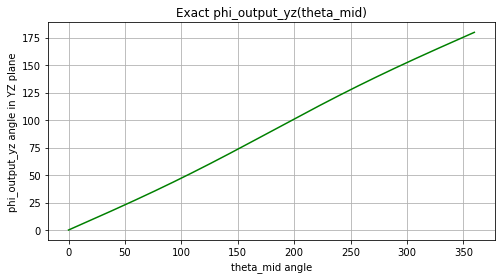

In [8]:
# phi_output_yz angle in YZ plane as function of theta_mid
# . analyse linearity to see if a linear approximation is sufficiently
#   accurate --> diff_arr is too large
# . check symmetry to see if a smaller lookup table is possible to
#   lookup phi_output_yz from theta_mid --> diff_arr is exactly 
#   symmetrical over 0 to 360 around theta_mid = 180
fig = plt.figure(figsize=(8, 4))  # width, height in inches
plt.plot(theta_mid_arr, phi_output_yz_exact_arr, 'g-')
plt.title('Exact phi_output_yz(theta_mid)')
plt.xlabel('theta_mid angle')
plt.ylabel('phi_output_yz angle in YZ plane')
plt.grid()
# save figure: phi_output_yz(theta_mid)
filename = os.path.normpath("../Pictures/phi_output_yz_as_function_of_theta_mid.jpg")
plt.savefig(filename)

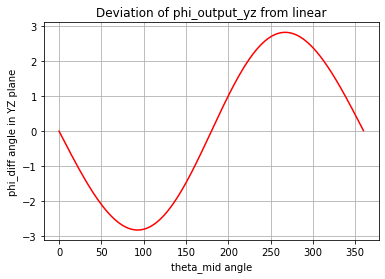

In [9]:
# Deviation of phi_output_yz from linear part
phi_linear_part_arr = phi_output_yz_for_analysis + theta_mid_arr / 2
phi_diff_arr = phi_output_yz_exact_arr - phi_linear_part_arr

plt.plot(theta_mid_arr, phi_diff_arr, 'r-')
plt.title('Deviation of phi_output_yz from linear')
plt.xlabel('theta_mid angle')
plt.ylabel('phi_diff angle in YZ plane')
plt.grid()

In [10]:
# Check symmetry in diff_arr for 0 < theta_mid < 360
flip360_phi_diff_arr = np.flip(phi_diff_arr)
# skip theta_mid = 0, because symmetry point theta_mid = 360 is not in phi_diff_arr
sym360_phi_diff_arr = phi_diff_arr[1:] + flip360_phi_diff_arr[0:-1]
if np.max(np.abs(sym360_phi_diff_arr)) < la.f_eps:
    print('The deviation of phi_output_yz from linear is EXACTLY symmetrical over 360 degrees.')
else:
    if np.max(np.abs(sym360_phi_diff_arr)) < angle_resolution:
        print('The deviation of phi_output_yz from linear is NEARLY symmetrical over 360 degrees.')
    else:
        print('The deviation of phi_output_yz from linear is NOT symmetrical over 360 degrees.')

    plt.plot(theta_mid_arr[1:], sym360_phi_diff_arr, 'r-')
    plt.title('Symmetry 360 of phi_output_yz deviation')
    plt.xlabel('theta_mid angle')
    plt.ylabel('sym360_phi_diff angle in YZ plane')
    plt.grid()

The deviation of phi_output_yz from linear is EXACTLY symmetrical over 360 degrees.


The deviation of phi_output_yz from linear is NEARLY symmetrical over 180 degrees.


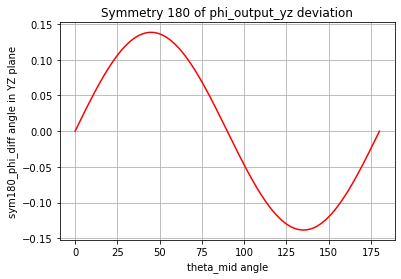

In [11]:
# Check symmetry in diff_arr for 0 < theta_mid < 180
select180 = range(0, N_points * 180 // N_degrees + 1)
flip180_phi_diff_arr = np.flip(phi_diff_arr[select180])
sym180_phi_diff_arr = phi_diff_arr[select180] - flip180_phi_diff_arr
if np.max(np.abs(sym180_phi_diff_arr)) < la.f_eps:
    print('The deviation of phi_output_yz from linear is EXACTLY symmetrical over 180 degrees.')
else:
    if np.max(np.abs(sym180_phi_diff_arr)) < angle_resolution:
        print('The deviation of phi_output_yz from linear is NEARLY symmetrical over 180 degrees.')
    else:
        print('The deviation of phi_output_yz from linear is NOT symmetrical over 180 degrees.')
    plt.plot(theta_mid_arr[select180], sym180_phi_diff_arr, 'r-')
    plt.title('Symmetry 180 of phi_output_yz deviation')
    plt.xlabel('theta_mid angle')
    plt.ylabel('sym180_phi_diff angle in YZ plane')
    plt.grid()

In [12]:
# Determine harmonics in phi_diff_arr using FFT
# . scale by 2/N_points for freq bins and by 1/N_points for DC bin 0
fft_phi_diff_arr = 2 / N_points * np.fft.rfft(phi_diff_arr)
fft_phi_diff_arr[0] = fft_phi_diff_arr[0] / 2  # DC bin
ampl_fft_phi_diff_arr = np.abs(fft_phi_diff_arr)
angle_fft_phi_diff_arr = np.degrees(np.angle(fft_phi_diff_arr))

if False:
    plt.plot(ampl_fft_phi_diff_arr, 'r-')
    plt.title('Frequency components in deviation of phi_output_yz from linear')
    plt.xlabel('frequency')
    plt.ylabel('ampl_fft_phi_diff angle in YZ plane')
    plt.grid()

nof_f = 10
for fi in range(nof_f):
    print('fi = %2d : fi_ampl = %20.18f, fi_angle = %14.10f' % (fi, ampl_fft_phi_diff_arr[fi], angle_fft_phi_diff_arr[fi]))

fi =  0 : fi_ampl = 0.000000000000005664, fi_angle = 180.0000000000
fi =  1 : fi_ampl = 2.816002962662007558, fi_angle =  90.0000000000
fi =  2 : fi_ampl = 0.069201193814899378, fi_angle = -90.0000000000
fi =  3 : fi_ampl = 0.002267424331060616, fi_angle =  90.0000000000
fi =  4 : fi_ampl = 0.000083580418418892, fi_angle = -89.9999999988
fi =  5 : fi_ampl = 0.000003286283323405, fi_angle =  90.0000000096
fi =  6 : fi_ampl = 0.000000134596644143, fi_angle = -89.9999994998
fi =  7 : fi_ampl = 0.000000005670194352, fi_angle =  89.9999985630
fi =  8 : fi_ampl = 0.000000000243845798, fi_angle = -90.0001186596
fi =  9 : fi_ampl = 0.000000000010653876, fi_angle =  90.0034017353


fi = 0 : ampl = 0.0000000000, angle =  180.0
fi = 1 : ampl = 2.8160029627, angle =   90.0


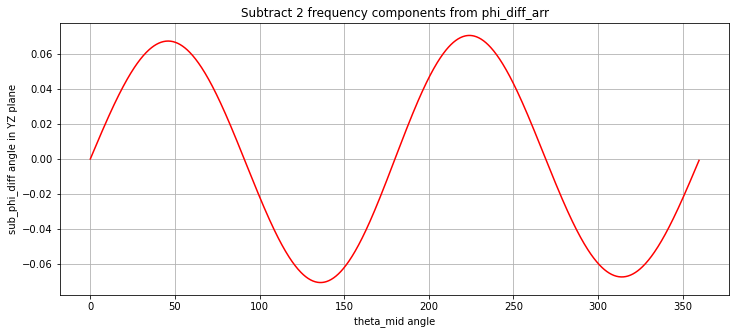

In [13]:
# Subtract frequency components from diff_arr
nof_f = 2
sub_phi_diff_arr = np.ndarray.copy(phi_diff_arr)
for fi in range(0, nof_f):
    fi_ampl = ampl_fft_phi_diff_arr[fi]
    fi_angle = angle_fft_phi_diff_arr[fi]
    print('fi = %d : ampl = %.10f, angle = %6.1f' % (fi, fi_ampl, fi_angle))
    sub_phi_diff_arr -= fi_ampl * np.cos(np.radians(fi * theta_mid_arr + fi_angle))

fig = plt.figure(figsize=(12, 5))  # width, height in inches
plt.plot(theta_mid_arr, sub_phi_diff_arr, 'r-')
plt.title('Subtract %d frequency components from phi_diff_arr' % nof_f)
plt.xlabel('theta_mid angle')
plt.ylabel('sub_phi_diff angle in YZ plane')
plt.grid()

## 3.1 Approximate phi_output_yz(theta_mid)

In [14]:
# Single harmonic approximation for phi_output_yz as function of theta_mid
# . sw.rfft_bins_of_phi_output_yz_as_function_of_theta_mid() and
#   sw.approximate_phi_output_yz_as_function_of_theta_mid() implement
#   the steps that were analysed above.
# Determine harmonics in exact phi_output_yz(theta_mid)
rfft_phi_output_yz_diff_ampl_arr, rfft_phi_output_yz_diff_angle_arr = \
    sw.rfft_bins_of_phi_output_yz_as_function_of_theta_mid(alpha_tilt, N_points)
f1_phi_output_yz_ampl = rfft_phi_output_yz_diff_ampl_arr[1]
phi_output_yz_approx_arr = sw.approximate_phi_output_yz_as_function_of_theta_mid(theta_mid_arr,
                                                                                 f1_phi_output_yz_ampl)

rfft_bins_of_phi_output_yz_as_function_of_theta_mid()
. phi_input_yz_for_analysis =  270
. phi_output_yz_for_analysis =  0
. f0 = 0 : f0_ampl = 0.0000000000, f0_angle = 180.0000000000, = DC = PhiOutputYzForAnalysis()
. f1 = 1 : f1_ampl = 2.8160029627, f1_angle = 90.0000000000
. Use cos(t + f1_angle) = cos(t + 90) = -sin(t)
approximate_phi_output_yz_as_function_of_theta_mid():
. f1_ampl              = 2.816


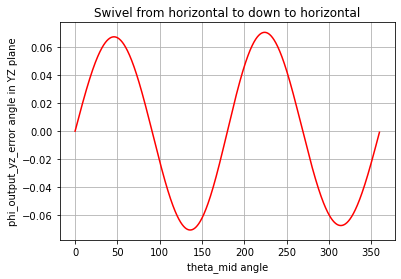

In [15]:
# Plot error in approximated phi_output_yz_approx_arr(theta_mid)
phi_output_yz_error_arr = phi_output_yz_exact_arr - phi_output_yz_approx_arr
                      
plt.plot(theta_mid_arr, phi_output_yz_error_arr, 'r')
plt.title('Swivel from horizontal to ' + output_tube_pointing + ' to horizontal')
plt.xlabel('theta_mid angle')
plt.ylabel('phi_output_yz_error angle in YZ plane')
plt.grid()

## **Conclusion:**

Approximate swivel output YZ angle as function of mid tube rotation:

* phi_output_yz_crosstalk(theta_mid) ~= theta_mid / 2 - f1_ampl * sin(theta_mid)
    
      for: 0 <= theta_mid <= 360 degrees (so all angles)
      with: f1_ampl = few degrees, approximates the small deviation from linear
          
* phi_input_yz_control = phi_output_yz_request + phi_input_yz_crosstalk_offset - phi_output_yz_crosstalk(theta_mid)

      with: phi_input_yz_crosstalk_offset = -90 for output_tube_pointing 'down', mid_tube_rotation 'positive'
                                            +90 for output_tube_pointing 'down', mid_tube_rotation 'negative'

# 4. Analyze swivel thrust theta_output_zx angle

## 4.1 Exact theta_output_zx(theta_mid)

min(theta_output_zx_exact) - 90.0 = 0.0
max(theta_output_zx_exact) - 90.0 = 100.0


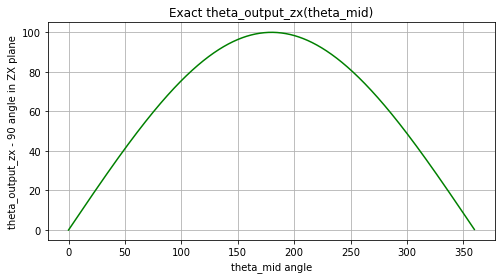

In [16]:
# theta_output_zx angle in ZX plane as function of theta_mid
# . check symmetry to see if a smaller lookup table is possible to
#   lookup theta_output_zx from theta_mid --> theta_output_zx is exactly 
#   symmetrical over 0 to 360 around theta_mid = 180
fig = plt.figure(figsize=(8, 4)) # width, height in inches
plt.plot(theta_mid_arr, theta_output_zx_exact_arr - theta_output_zx_horizontal, 'g-')
plt.title('Exact theta_output_zx(theta_mid)')
plt.xlabel('theta_mid angle')
plt.ylabel('theta_output_zx - %d angle in ZX plane' % theta_output_zx_horizontal)
plt.grid()
# save figure: theta_output_zx(theta_mid)
filename = os.path.normpath("../Pictures/theta_output_zx_as_function_of_theta_mid.jpg")
plt.savefig(filename)

# Expect theta_output_zx in ZX plane in range 90 (horizontal) to 90 + 4 * alpha_tile
print('min(theta_output_zx_exact) - %.1f = %.1f' %
      (theta_output_zx_horizontal, np.min(theta_output_zx_exact_arr) - theta_output_zx_horizontal))
print('max(theta_output_zx_exact) - %.1f = %.1f' %
      (theta_output_zx_horizontal, np.max(theta_output_zx_exact_arr) - theta_output_zx_horizontal))

In [17]:
# Check symmetry in theta_output_zx_exact_arr for 0 < theta_mid < 360
flip360_theta_output_zx_arr = np.flip(theta_output_zx_exact_arr)
# skip theta_mid = 0, because symmetry point theta_mid = 360 is not in theta_output_zx_exact_arr
symm360_theta_output_zx_arr = theta_output_zx_exact_arr[1:] - flip360_theta_output_zx_arr[0:-1]
if np.max(np.abs(symm360_theta_output_zx_arr)) < la.f_eps:
    print('The theta_output_zx is EXACTLY symmetrical over 360 degrees.')
else:
    if np.max(np.abs(symm360_theta_output_zx_arr)) < angle_resolution:
        print('The theta_output_zx is NEARLY symmetrical over 360 degrees.')
    else:
        print('The theta_output_zx is NOT symmetrical over 360 degrees.')
        
    plt.plot(theta_mid_arr[1:], symm360_theta_output_zx_arr, 'r-')
    plt.title('Symmetry 360 of theta_output_zx')
    plt.xlabel('theta_mid angle')
    plt.ylabel('symm360_theta_output_zx angle in ZX plane')
    plt.grid()

The theta_output_zx is EXACTLY symmetrical over 360 degrees.


theta_output_zx_horizontal =  90


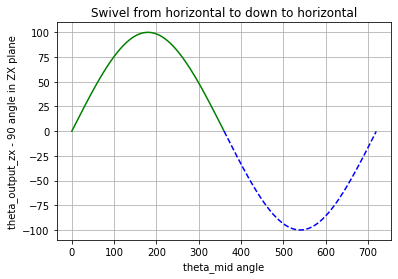

In [18]:
# Create symmetrical sinus like signal from theta_output_arr
symm_theta_mid_arr = N_degrees + theta_mid_arr
symm_theta_output_zx_arr = 2 * theta_output_zx_horizontal - theta_output_zx_exact_arr

print('theta_output_zx_horizontal = ', theta_output_zx_horizontal)
plt.plot(theta_mid_arr, theta_output_zx_exact_arr - theta_output_zx_horizontal, 'g-',
         symm_theta_mid_arr, symm_theta_output_zx_arr - theta_output_zx_horizontal, 'b--')
plt.title('Swivel from horizontal to ' + output_tube_pointing + ' to horizontal')
plt.xlabel('theta_mid angle')
plt.ylabel('theta_output_zx - %d angle in ZX plane' % theta_output_zx_horizontal)
plt.grid()

In [19]:
# Determine harmonics in theta_output_arr2 using FFT
N_points2 = 2 * N_points
theta_mid_arr2 = np.append(theta_mid_arr, symm_theta_mid_arr)
theta_output_zx_arr2 = np.append(theta_output_zx_exact_arr, symm_theta_output_zx_arr)

# . scale by 2 / N_points2 for freq bins and by 1 / N_points2 for DC bin 0
fft_theta_output_zx_arr2 = 2 / N_points2 * np.fft.rfft(theta_output_zx_arr2)
fft_theta_output_zx_arr2[0] = fft_theta_output_zx_arr2[0] / 2  # DC bin
fft_theta_output_zx_ampl_arr2 = np.abs(fft_theta_output_zx_arr2)
fft_theta_output_zx_angle_arr2 = np.degrees(np.angle(fft_theta_output_zx_arr2))

if False:
    plt.plot(fft_theta_output_zx_ampl_arr2, 'r-')
    plt.title('Frequency components in theta_output_zx_arr2')
    plt.xlabel('frequency')
    plt.ylabel('fft_theta_output_zx_ampl angle in ZX plane')
    plt.grid()

nof_f = 15
for fi in range(nof_f):
    print('fi = %2d : ampl = %20.18f, angle = %14.10f' %
          (fi, fft_theta_output_zx_ampl_arr2[fi], fft_theta_output_zx_angle_arr2[fi]))

fi =  0 : ampl = 90.000000000000000000, angle =   0.0000000000
fi =  1 : ampl = 99.179360973761930609, angle = -90.0000000000
fi =  2 : ampl = 0.000000000000000000, angle =   0.0000000000
fi =  3 : ampl = 0.802431588024202780, angle =  90.0000000000
fi =  4 : ampl = 0.000000000000000000, angle =   0.0000000000
fi =  5 : ampl = 0.017673589176769144, angle = -90.0000000000
fi =  6 : ampl = 0.000000000000000000, angle =   0.0000000000
fi =  7 : ampl = 0.000515964517513025, angle =  89.9999999999
fi =  8 : ampl = 0.000000000000000000, angle =   0.0000000000
fi =  9 : ampl = 0.000017236506752742, angle = -90.0000000053
fi = 10 : ampl = 0.000000000000000000, angle =   0.0000000000
fi = 11 : ampl = 0.000000623287701924, angle =  90.0000000028
fi = 12 : ampl = 0.000000000000000000, angle =   0.0000000000
fi = 13 : ampl = 0.000000023746519703, angle = -89.9999997849
fi = 14 : ampl = 0.000000000000000000, angle =   0.0000000000


fi =  0 : ampl = 90.00000, angle =    0.0
fi =  1 : ampl = 99.17936, angle =  -90.0


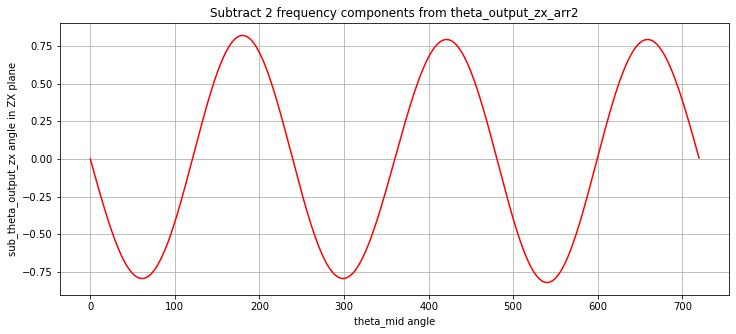

In [20]:
# Subtract frequency components from theta_output_arr
nof_f = 2
sub_theta_output_zx_arr2 = np.copy(theta_output_zx_arr2)
for fi in range(0, nof_f):
    ampl = fft_theta_output_zx_ampl_arr2[fi]
    angle = fft_theta_output_zx_angle_arr2[fi]
    print('fi = %2d : ampl = %8.5f, angle = %6.1f' % (fi, ampl, angle))
    sub_theta_output_zx_arr2 -= ampl * np.cos(np.radians(fi * theta_mid_arr2 / 2 + angle))

fig = plt.figure(figsize=(12, 5))  # width, height in inches
plt.plot(theta_mid_arr2, sub_theta_output_zx_arr2, 'r-')
plt.title('Subtract %d frequency components from theta_output_zx_arr2' % nof_f)
plt.xlabel('theta_mid angle')
plt.ylabel('sub_theta_output_zx angle in ZX plane')
plt.grid()

## 4.1 Approximate theta_output_zx(theta_mid)

In [21]:
# Single harmonic approximation for theta_output_zx(theta_mid)
# . sw.rfft_bins_of_theta_output_zx_as_function_of_theta_mid() and
#   sw.approximate_theta_output_zx_as_function_of_theta_mid() implement
#   the steps that were analysed above.
# Determine harmonics in exact theta_output_zx(theta_mid)
rfft_theta_output_zx_ampl_arr2, rfft_theta_output_zx_angle_arr2 = \
    sw.rfft_bins_of_theta_output_zx_as_function_of_theta_mid(alpha_tilt,
                                                             mid_tube_rotation,
                                                             N_points)
f0_theta_output_zx_ampl = rfft_theta_output_zx_ampl_arr2[0]  # = theta_output_zx_horizontal
f1_theta_output_zx_ampl = rfft_theta_output_zx_ampl_arr2[1]  # ~= swivel_tilt_max
f1_theta_output_zx_angle = rfft_theta_output_zx_angle_arr2[1]
theta_output_zx_approx_arr = sw.approximate_theta_output_zx_as_function_of_theta_mid(theta_mid_arr,
                                                                                     f0_theta_output_zx_ampl,
                                                                                     f1_theta_output_zx_ampl)

rfft_bins_of_theta_output_zx_as_function_of_theta_mid()
. mid_tube_rotation =  positive
. phi_input_yz_horizontal =  180
. theta_output_zx_horizontal =  90
. f0 =  0 : f0_ampl = 90.0000000000, f0_angle =    0.0, = DC = ThetaOutputZxHorizontal()
. f1 =  1 : f1_ampl = 99.1793609738, f1_angle =  -90.0, ~= SwivelTiltMax()
. Use +1 * f0_ampl
. Use cos(t + f1_angle) = cos(t - 90) = sin(t)
approximate_theta_output_zx_as_function_of_theta_mid()
. f0_ampl = 90.000, f1_ampl = 99.179


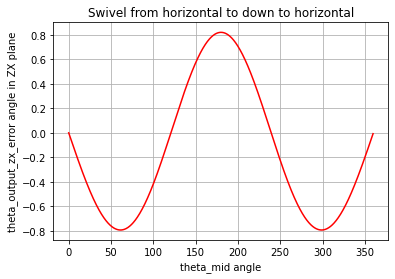

In [22]:
# Plot error in approximated theta_output_zx(theta_mid)
theta_output_zx_error_arr = theta_output_zx_exact_arr - theta_output_zx_approx_arr

plt.plot(theta_mid_arr, theta_output_zx_error_arr, 'r')
plt.title('Swivel from horizontal to ' + output_tube_pointing + ' to horizontal')
plt.xlabel('theta_mid angle')
plt.ylabel('theta_output_zx_error angle in ZX plane')
plt.grid()

## **Conclusion:**

* Approximate swivel output ZX angle as function of mid tube rotation:
    
      theta_output_zx(theta_mid) ~= theta_output_zx_horizontal + f1_ampl * sin(theta_mid / 2)
    
          for: 0 <= theta_mid <= 360 (so all angles)
          with: f1_ampl ~= swivel_tilt_max
    
* Inverse approximate function:
    
      theta_mid(theta_output_zx) ~=  2 * arcsin(f1_fraction), when mid_tube_rotation is 'positive'
      theta_mid(theta_output_zx) ~= -2 * arcsin(f1_fraction), when mid_tube_rotation is 'negative'
    
          for: abs(f1_fraction) <= 1, because -1 <= x <= +1 for arcsin(x)
          with: f1_fraction = (theta_output_zx - theta_output_zx_horizontal) / f1_ampl

# 5. Hover control

Model small swivel output movements around vertical down for hover control. Requires swivel_tilt_max > 90 to be able to move the swivel around vertical down in the ZX plane.

* varying theta_mid yields pitch control (in ZX plane),
* varying phi_input_yz yields yaw control (in YZ plane),
* together pitch and yaw yield hover control in XY plane

Can also model hover with swivel vertical up, this would be practical for an airplane that can hover upside down.

In [23]:
# Determine theta_mid for theta_output_zx dependent on hover with output_tube_pointing down or up
nof_steps = 11
p = 1  # use p > 1 to have finer theta_output_zx resolution in hover range around 180 degrees
p = 9
theta_output_zx_list = np.linspace(theta_output_zx_horizontal**p, theta_output_zx_max**p, nof_steps)**(1/p)
if output_tube_pointing == 'up':
    theta_output_zx_list = 2 * theta_output_zx_horizontal - theta_output_zx_list
theta_output_zx_resolution = 0.01  # resolution in degrees, to determine theta_mid(theta_output_zx)
theta_mid_list = []
theta_mid_prev = np.NaN
print('  theta_output_zx   phi_output_yz   theta_mid   theta_mid_delta')
print('request    result')
for theta_output_zx_request in theta_output_zx_list:
    theta_mid = sw.DetermineThetaMidForThetaOutputZx(theta_output_zx_request, theta_output_zx_resolution,
                                                     alpha_tilt, output_tube_pointing)
    t_vector = sw.SwivelThrustVector(x_input, x_mid, x_output, alpha_tilt,
                                     phi_input_yz_horizontal, theta_mid)
    phi_output_yz = la.toAngle360(la.fAngleYZ(t_vector))
    theta_output_zx = theta_output_zx_horizontal + la.toAngle360(la.fAngleXR(t_vector))
    theta_mid_list.append(theta_mid)
    theta_mid_delta = theta_mid - theta_mid_prev
    theta_mid_prev = theta_mid
    print('%7.3f   %7.3f         %7.3f     %7.3f              %4.1f' %
          (theta_output_zx_request, theta_output_zx, phi_output_yz, theta_mid, theta_mid_delta))

  theta_output_zx   phi_output_yz   theta_mid   theta_mid_delta
request    result
 90.000    90.000             nan       0.000               nan
147.286   147.288         303.196      71.653              71.7
158.972   158.971         311.727      89.077              17.4
166.261   166.259         317.827     101.228              12.2
171.643   171.646         322.942     111.226              10.0
175.940   175.943         327.578     120.146               8.9
179.532   179.530         332.022     128.584               8.4
182.628   182.625         336.520     137.021               8.4
185.353   185.348         341.351     145.986               9.0
187.791   187.788         347.140     156.621              10.6
190.000   190.000         360.000     180.000              23.4


theta_output_zx_horizontal = 90


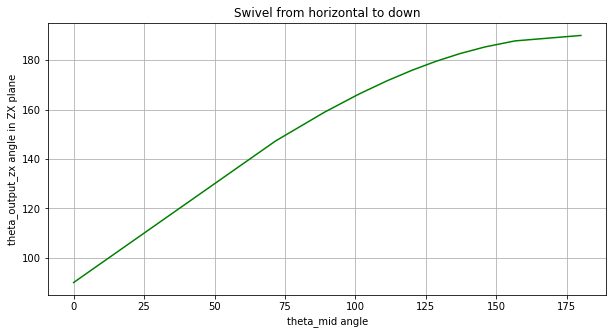

In [24]:
# Plot theta_mid(theta_output_zx)
print('theta_output_zx_horizontal =', theta_output_zx_horizontal)
fig = plt.figure(figsize=(10, 5))  # width, height in inches
plt.plot(theta_mid_list, theta_output_zx_list, 'g-')
plt.title('Swivel from horizontal to %s' % output_tube_pointing)
plt.xlabel('theta_mid angle')
plt.ylabel('theta_output_zx angle in ZX plane')
plt.grid()

In [25]:
# Vary theta_output_zx and phi_output_yz to create a circle motion around swivel vertical down
# . determine theta_mid for theta_output_zx
# . determine phi_output_yz due to theta_mid
# . adjust phi_input_yz to get wanted phi_output_yz

# Hover circle radius in XY plane
if output_tube_pointing == 'down':
    theta_output_zx_approx_max = f0_theta_output_zx_ampl + f1_theta_output_zx_ampl  # ~= theta_output_zx_max
    hover_ampl = theta_output_zx_approx_max - theta_output_zx_vertical
    print('theta_output_zx_horizontal =', theta_output_zx_horizontal)
    print('theta_output_zx_approx_max =', theta_output_zx_approx_max)
    print('theta_output_zx_vertical =', theta_output_zx_vertical)
else:
    theta_output_zx_approx_min = f0_theta_output_zx_ampl - f1_theta_output_zx_ampl  # ~= theta_output_zx_min
    hover_ampl = theta_output_zx_vertical - theta_output_zx_approx_min
    print('theta_output_zx_vertical =', theta_output_zx_vertical)
    print('theta_output_zx_approx_min =', theta_output_zx_approx_min)
    print('theta_output_zx_horizontal =', theta_output_zx_horizontal)
print('hover_ampl =', hover_ampl)
print('phi_output_yz_vertical =', phi_output_yz_vertical)
print('phi_output_yz_horizontal =', phi_output_yz_horizontal)
print('phi_input_yz_vertical =', phi_input_yz_vertical)
print('phi_input_yz_horizontal =', phi_input_yz_horizontal)
print('phi_input_yz_crosstalk_offset =', phi_input_yz_crosstalk_offset)
print('')

# Hover circle angle in XY plane
psi_hover_arr = np.linspace(0, N_degrees, N_points, endpoint=False)

# Vary theta_output_zx in ZX plane for x direction
# . for psi_hover = 0 the pitch is in +x direction, so negative ZX rotation
pitch_arr = -1 * hover_ampl * np.cos(np.radians(psi_hover_arr))
request_theta_output_zx_pitch_arr = theta_output_zx_vertical + pitch_arr

# Vary phi_output_yz in YZ plane for y direction
# . for psi_hover = 0 the yaw is in +y direction, so postive YZ rotation
yaw_arr = hover_ampl * np.sin(np.radians(psi_hover_arr))
request_phi_output_yz_yaw_arr = phi_output_yz_vertical + yaw_arr

# Amplitude of circular hover control
ampl_arr = np.sqrt(pitch_arr**2 + yaw_arr**2)

# Hover control
# . approximate theta_mid due to theta_output_zx pitch control
hover_theta_mid_arr = sw.approximate_theta_mid_as_function_of_theta_output_zx(
                          request_theta_output_zx_pitch_arr,
                          f0_theta_output_zx_ampl, f1_theta_output_zx_ampl,
                          mid_tube_rotation)
        
# . approximate phi_output_yz due to theta_mid
hover_phi_output_yz_crosstalk_arr = sw.approximate_phi_output_yz_as_function_of_theta_mid(
                                        hover_theta_mid_arr,
                                        f1_phi_output_yz_ampl)

# . adjust phi_input_yz for theta_mid crosstalk, to achieve wanted phi_output_yz
hover_phi_input_yz_arr = request_phi_output_yz_yaw_arr + \
                         phi_input_yz_crosstalk_offset - hover_phi_output_yz_crosstalk_arr

# Apply hover_theta_mid_arr and hover_phi_input_yz_arr to get cicular hover around vertical
t_vector_list = sw.SwivelThrustVectorsList(x_input, x_mid, x_output, alpha_tilt,
                                           hover_phi_input_yz_arr, hover_theta_mid_arr)
result_phi_output_yz_yaw_arr = la.toAngleArr360(la.fAngleArrYZ(t_vector_list))
# . select linear angle range
if output_tube_pointing == 'down':
    result_theta_output_zx_pitch_arr = la.toAngleArr360(la.fAngleArrZX(t_vector_list))
else:
    result_theta_output_zx_pitch_arr = la.toAngleArr180(la.fAngleArrZX(t_vector_list))

theta_output_zx_horizontal = 90
theta_output_zx_approx_max = 189.1793609737619
theta_output_zx_vertical = 180
hover_ampl = 9.179360973761902
phi_output_yz_vertical = 270
phi_output_yz_horizontal = 180
phi_input_yz_vertical = 90
phi_input_yz_horizontal = 180
phi_input_yz_crosstalk_offset = 270

approximate_theta_mid_as_function_of_theta_output_zx()
. f0_ampl = 90.000, f1_ampl = 99.179
. mid_tube_rotation = positive
approximate_phi_output_yz_as_function_of_theta_mid():
. f1_ampl              = 2.816


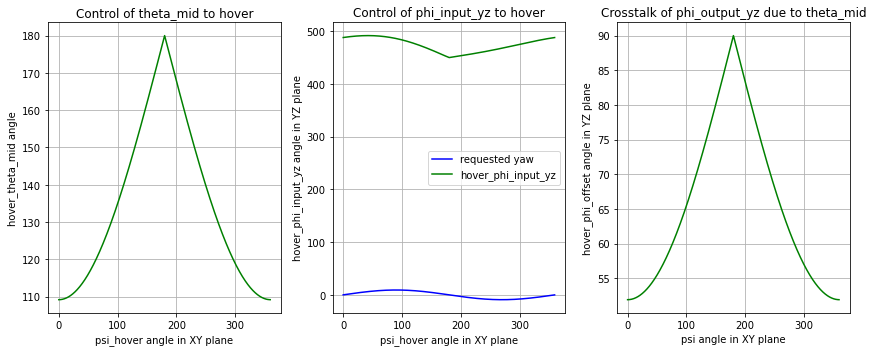

In [26]:
# Plot hover control
fig = plt.figure(figsize=(12, 5))  # width, height in inches
plt.subplot(1, 3, 1)
plt.plot(psi_hover_arr, hover_theta_mid_arr, 'g-')
plt.title('Control of theta_mid to hover')
plt.xlabel('psi_hover angle in XY plane')
plt.ylabel('hover_theta_mid angle')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(psi_hover_arr, yaw_arr, 'b-', label = 'requested yaw')
plt.plot(psi_hover_arr, hover_phi_input_yz_arr, 'g-', label = 'hover_phi_input_yz')
plt.title('Control of phi_input_yz to hover')
plt.xlabel('psi_hover angle in XY plane')
plt.ylabel('hover_phi_input_yz angle in YZ plane')
plt.grid()
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(psi_hover_arr, hover_phi_output_yz_crosstalk_arr, 'g-')
plt.title('Crosstalk of phi_output_yz due to theta_mid')
plt.xlabel('psi angle in XY plane')
plt.ylabel('hover_phi_offset angle in YZ plane')
plt.grid()
plt.tight_layout()

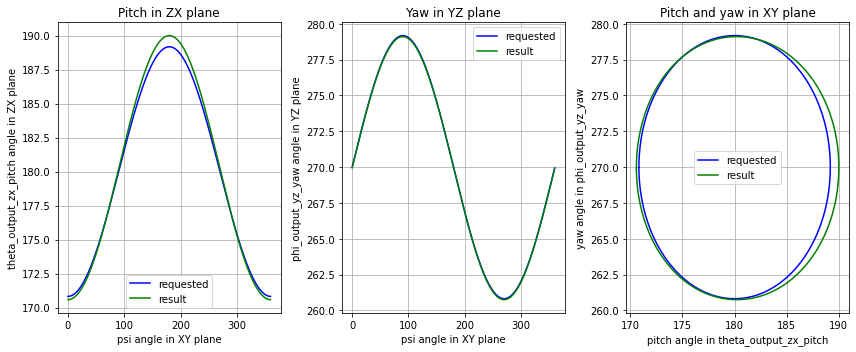

In [27]:
# Plot hover result
fig = plt.figure(figsize=(12, 5))  # width, height in inches
plt.subplot(1, 3, 1)
plt.plot(psi_hover_arr, request_theta_output_zx_pitch_arr, 'b-', label = 'requested')
plt.plot(psi_hover_arr, result_theta_output_zx_pitch_arr, 'g-', label = 'result')
plt.title('Pitch in ZX plane')
plt.xlabel('psi angle in XY plane')
plt.ylabel('theta_output_zx_pitch angle in ZX plane')
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(psi_hover_arr, request_phi_output_yz_yaw_arr, 'b-', label = 'requested')
plt.plot(psi_hover_arr, result_phi_output_yz_yaw_arr, 'g-', label = 'result')
plt.title('Yaw in YZ plane')
plt.xlabel('psi angle in XY plane')
plt.ylabel('phi_output_yz_yaw angle in YZ plane')
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(request_theta_output_zx_pitch_arr, request_phi_output_yz_yaw_arr, 'b-', label = 'requested')
plt.plot(result_theta_output_zx_pitch_arr, result_phi_output_yz_yaw_arr, 'g-', label = 'result')
plt.title('Pitch and yaw in XY plane')
plt.xlabel('pitch angle in theta_output_zx_pitch')
plt.ylabel('yaw angle in phi_output_yz_yaw')
plt.legend()
plt.grid()
plt.tight_layout()

In [28]:
# Check hover result
print('hover_ampl = %.3f' % hover_ampl)

# . use 0:N_points//2 range to have only one index for maximum, due to circular hover motion
hover_pitch_arr = result_theta_output_zx_pitch_arr - theta_output_zx_vertical
hover_pitch_error_arr = pitch_arr - hover_pitch_arr
hover_pitch_error_max = np.max(np.abs(hover_pitch_error_arr[0:N_points//2]))
hover_pitch_error_max_index = np.argmax(np.abs(hover_pitch_error_arr[0:N_points//2]))
hover_pitch_error_max_psi = psi_hover_arr[hover_pitch_error_max_index]
hover_pitch_error_max_percent = 100 * hover_pitch_error_max / hover_ampl

hover_yaw_arr = result_phi_output_yz_yaw_arr - phi_output_yz_vertical
hover_yaw_error_arr = yaw_arr - hover_yaw_arr
hover_yaw_error_max = np.max(np.abs(hover_yaw_error_arr[0:N_points//2]))
hover_yaw_error_max_index = np.argmax(np.abs(hover_yaw_error_arr[0:N_points//2]))
hover_yaw_error_max_psi = psi_hover_arr[hover_yaw_error_max_index]
hover_yaw_error_max_percent = 100 *  hover_yaw_error_max / hover_ampl

# . ampl = sqrt(pitch**2 + yaw**2) for circular hover motion
hover_ampl_arr = np.sqrt(hover_pitch_arr**2 + hover_yaw_arr**2)
hover_ampl_error_arr = hover_ampl - hover_ampl_arr
hover_ampl_error_max = np.max(np.abs(hover_ampl_error_arr[0:N_points//2]))
hover_ampl_error_max_index = np.argmax(np.abs(hover_ampl_error_arr[0:N_points//2]))
hover_ampl_error_max_psi = psi_hover_arr[hover_ampl_error_max_index]
hover_ampl_error_max_percent = 100 * hover_ampl_error_max / hover_ampl

# Log maximum hover error relative to hover amplitude in percent
print('hover_pitch_error_max = %7.3f, hover_pitch_error_max_percent = %7.3f %% at psi_hover = %6.2f degrees' %
      (hover_pitch_error_max, hover_pitch_error_max_percent, hover_pitch_error_max_psi))
print('hover_yaw_error_max   = %7.3f, hover_yaw_error_max_percent   = %7.3f %% at psi_hover = %6.2f degrees' %
      (hover_yaw_error_max, hover_yaw_error_max_percent, hover_yaw_error_max_psi))
print('hover_ampl_error_max  = %7.3f, hover_ampl_error_max_percent  = %7.3f %% at psi_hover = %6.2f degrees' %
      (hover_ampl_error_max, hover_ampl_error_max_percent, hover_ampl_error_max_psi))

hover_ampl = 9.179
hover_pitch_error_max =   0.821, hover_pitch_error_max_percent =   8.940 % at psi_hover = 179.65 degrees
hover_yaw_error_max   =   0.071, hover_yaw_error_max_percent   =   0.772 % at psi_hover = 102.30 degrees
hover_ampl_error_max  =   0.821, hover_ampl_error_max_percent  =   8.940 % at psi_hover = 179.65 degrees


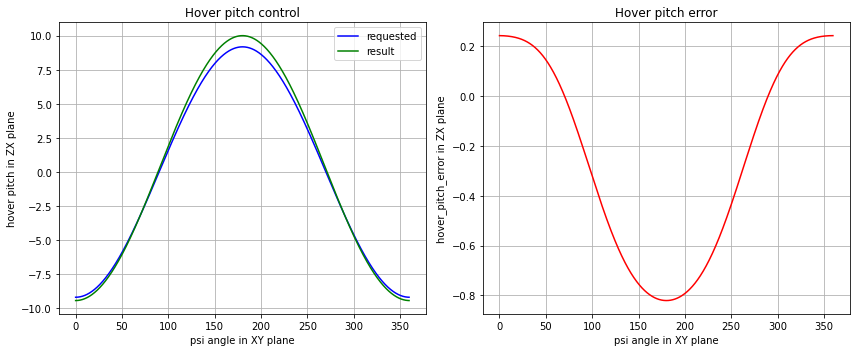

In [29]:
# Plot hover pitch control and error
fig = plt.figure(figsize=(12, 5))  # width, height in inches
plt.subplot(1, 2, 1)
plt.plot(psi_hover_arr, pitch_arr, 'b-', label = 'requested')
plt.plot(psi_hover_arr, hover_pitch_arr, 'g-', label = 'result')
plt.title('Hover pitch control')
plt.xlabel('psi angle in XY plane')
plt.ylabel('hover pitch in ZX plane')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(psi_hover_arr, hover_pitch_error_arr, 'r-')
plt.title('Hover pitch error')
plt.xlabel('psi angle in XY plane')
plt.ylabel('hover_pitch_error in ZX plane')
plt.grid()
plt.tight_layout()

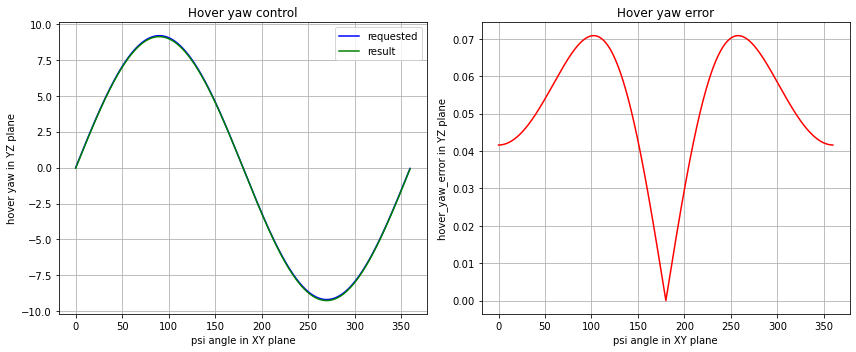

In [30]:
# Plot hover yaw control and error
fig = plt.figure(figsize=(12, 5))  # width, height in inches
plt.subplot(1, 2, 1)
plt.plot(psi_hover_arr, yaw_arr, 'b-', label = 'requested')
plt.plot(psi_hover_arr, hover_yaw_arr, 'g-', label = 'result')
plt.title('Hover yaw control')
plt.xlabel('psi angle in XY plane')
plt.ylabel('hover yaw in YZ plane')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(psi_hover_arr, hover_yaw_error_arr, 'r-')
plt.title('Hover yaw error')
plt.xlabel('psi angle in XY plane')
plt.ylabel('hover_yaw_error in YZ plane')
plt.grid()
plt.tight_layout()

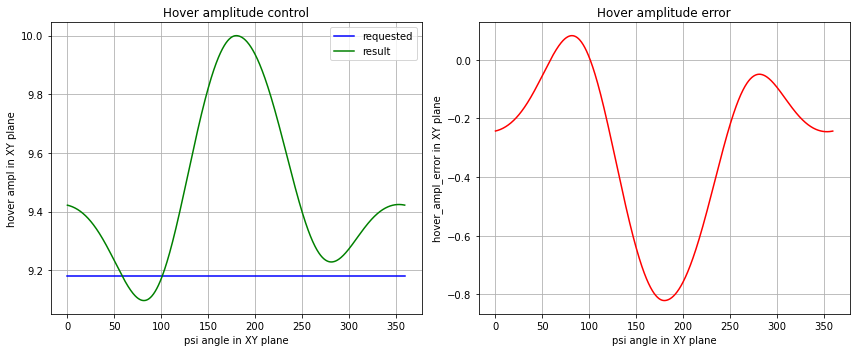

In [31]:
# Plot hover ampl control and error
fig = plt.figure(figsize=(12, 5))  # width, height in inches
plt.subplot(1, 2, 1)
plt.plot(psi_hover_arr, ampl_arr, 'b-', label = 'requested')
plt.plot(psi_hover_arr, hover_ampl_arr, 'g-', label = 'result')
plt.title('Hover amplitude control')
plt.xlabel('psi angle in XY plane')
plt.ylabel('hover ampl in XY plane')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(psi_hover_arr, hover_ampl_error_arr, 'r-')
plt.title('Hover amplitude error')
plt.xlabel('psi angle in XY plane')
plt.ylabel('hover_ampl_error in XY plane')
plt.grid()
plt.tight_layout()

# 6. Transition control

Model swivel output movement between horizontal and maximum swivel tilt for transition control.

In [32]:
# Vary theta_output_zx in ZX plane to transition swivel from horizontal and vertical down
# . determine theta_mid for theta_output
# . determine phi_output_yz due to theta_mid
# . adjust phi_input_yz to get wanted phi_output_yz in ZX plane
# Also support transition swivel from horizontal and vertical up, to check the model.
print('theta_output_zx_horizontal     = ', theta_output_zx_horizontal)
if output_tube_pointing == 'down':
    theta_output_zx_approx_max = f0_theta_output_zx_ampl + f1_theta_output_zx_ampl  # ~= theta_output_zx_max
    theta_output_zx_transition_max = theta_output_zx_max
    theta_output_zx_transition_max = theta_output_zx_approx_max
    #theta_output_zx_transition_max = theta_output_zx_vertical
    print('theta_output_zx_transition_max = ', theta_output_zx_transition_max)
    request_theta_output_zx_transition_arr = np.linspace(theta_output_zx_horizontal,
                                                         theta_output_zx_transition_max, N_points, endpoint=True)
else:
    theta_output_zx_approx_min = f0_theta_output_zx_ampl - f1_theta_output_zx_ampl  # ~= theta_output_zx_min
    theta_output_zx_transition_min = theta_output_zx_min
    theta_output_zx_transition_min = theta_output_zx_approx_min
    #theta_output_zx_transition_min = theta_output_zx_vertical
    print('theta_output_zx_transition_min = ', theta_output_zx_transition_min)
    request_theta_output_zx_transition_arr = np.linspace(theta_output_zx_horizontal,
                                                         theta_output_zx_transition_min, N_points, endpoint=True)

# Transition control
# . keep swivel output in vertical ZX plane during transition
request_phi_output_yz_transition_arr = phi_output_yz_vertical

# . approximate theta_mid due to theta_output_zx transition control
transition_theta_mid_arr = sw.approximate_theta_mid_as_function_of_theta_output_zx(
                               request_theta_output_zx_transition_arr,
                               f0_theta_output_zx_ampl, f1_theta_output_zx_ampl,
                               mid_tube_rotation)
    
# . approximate phi_output_yz due to theta_mid
transition_phi_output_yz_crosstalk_arr = sw.approximate_phi_output_yz_as_function_of_theta_mid(
                                             transition_theta_mid_arr,
                                             f1_phi_output_yz_ampl)

# . adjust phi_input_yz for theta_mid crosstalk, to achieve wanted phi_output_yz in YZ plane
transition_phi_input_yz_arr = request_phi_output_yz_transition_arr + \
                              phi_input_yz_crosstalk_offset - transition_phi_output_yz_crosstalk_arr

# Apply transition
t_vector_list = sw.SwivelThrustVectorsList(x_input, x_mid, x_output, alpha_tilt,
                                           transition_phi_input_yz_arr, transition_theta_mid_arr)
result_phi_output_yz_transition_arr = la.toAngleArr360(la.fAngleArrYZ(t_vector_list))
print(result_phi_output_yz_transition_arr)
# . select linear ZX angle range
if output_tube_pointing == 'down':
    result_theta_output_zx_transition_arr = la.toAngleArr360(la.fAngleArrZX(t_vector_list))
else:
    result_theta_output_zx_transition_arr = la.toAngleArr180(la.fAngleArrZX(t_vector_list))

theta_output_zx_horizontal     =  90
theta_output_zx_transition_max =  189.1793609737619
approximate_theta_mid_as_function_of_theta_output_zx()
. f0_ampl = 90.000, f1_ampl = 99.179
. mid_tube_rotation = positive
approximate_phi_output_yz_as_function_of_theta_mid():
. f1_ampl              = 2.816
[270.00000006 270.00025791 270.00051581 ... 269.9819953  269.98719861
 270.        ]


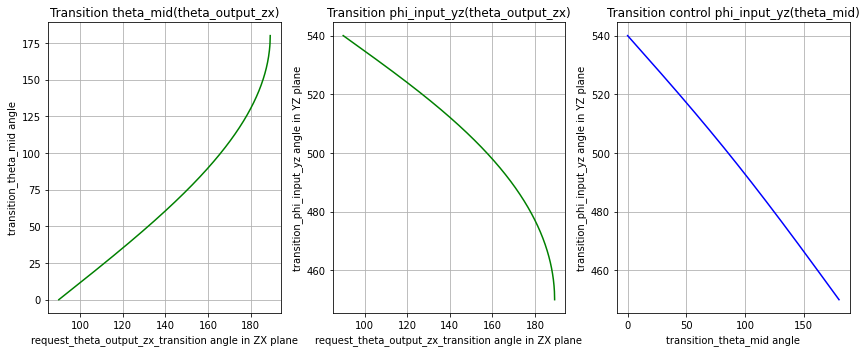

In [33]:
# Plot transition control
fig = plt.figure(figsize=(12, 5))  # width, height in inches
plt.subplot(1, 3, 1)
plt.plot(request_theta_output_zx_transition_arr, transition_theta_mid_arr, 'g-')
plt.title('Transition theta_mid(theta_output_zx)')
plt.xlabel('request_theta_output_zx_transition angle in ZX plane')
plt.ylabel('transition_theta_mid angle')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(request_theta_output_zx_transition_arr, transition_phi_input_yz_arr, 'g-')
plt.title('Transition phi_input_yz(theta_output_zx)')
plt.xlabel('request_theta_output_zx_transition angle in ZX plane')
plt.ylabel('transition_phi_input_yz angle in YZ plane')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(transition_theta_mid_arr, transition_phi_input_yz_arr, 'b-')
plt.title('Transition control phi_input_yz(theta_mid)')
plt.xlabel('transition_theta_mid angle')
plt.ylabel('transition_phi_input_yz angle in YZ plane')
plt.grid()
plt.tight_layout()

In [34]:
# Check transition result
transition_phi_output_yz_error_arr = result_phi_output_yz_transition_arr - request_phi_output_yz_transition_arr
transition_theta_output_zx_error_arr = result_theta_output_zx_transition_arr - request_theta_output_zx_transition_arr

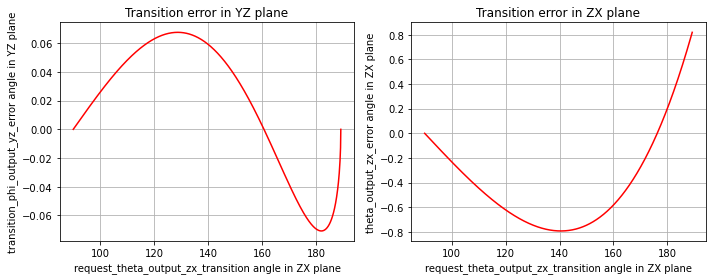

In [35]:
# Plot transition result
fig = plt.figure(figsize=(10, 4))  # width, height in inches
plt.subplot(1, 2, 1)
plt.plot(request_theta_output_zx_transition_arr, transition_phi_output_yz_error_arr, 'r-')
plt.title('Transition error in YZ plane')
plt.xlabel('request_theta_output_zx_transition angle in ZX plane')
plt.ylabel('transition_phi_output_yz_error angle in YZ plane')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(request_theta_output_zx_transition_arr, transition_theta_output_zx_error_arr, 'r-')
plt.title('Transition error in ZX plane')
plt.xlabel('request_theta_output_zx_transition angle in ZX plane')
plt.ylabel('theta_output_zx_error angle in ZX plane')
plt.grid()
plt.tight_layout()